## Comparing mean FEV1 changes between complete (92 for model and 95 for StratX) and incomplete fissures at 6m and 1 year based on model-derived and StratX-derived fissure completeness scores

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# === Load TLVR Excel file ===
tlvr_path = r"------ INSERT PATH HERE ------\TLVR_List.xlsx"
df = pd.read_excel(tlvr_path)

# === Clean MRN column ===
df["MRN"] = df["MRN"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True)

# === Define completeness thresholds ===
model_thresh = 92
stratx_thresh = 95

# === Define FEV1 columns to test ===
post_fev_cols = ["PostFev1_6m", "PostFev1_1yr"]

# === Loop over post-treatment FEV1 columns ===
for col in post_fev_cols:
    delta_col = f"Delta_{col}"
    df[delta_col] = df[col] - df["PreFev1"]

    # --- ModelCompleteness comparison ---
    model_complete = df[df["ModelCompleteness"] >= model_thresh][delta_col].dropna()
    model_incomplete = df[df["ModelCompleteness"] < model_thresh][delta_col].dropna()

    t_stat_model, t_p_model = ttest_ind(model_complete, model_incomplete, equal_var=False)

    print(f"\n🧪 {col} — ModelCompleteness (≥{model_thresh} = Complete)")
    print(f"  t-test: t = {t_stat_model:.3f}, p = {t_p_model:.4f}")
    print(f"  Mean ΔFEV1 (Complete):   {model_complete.mean():.2f}")
    print(f"  Mean ΔFEV1 (Incomplete): {model_incomplete.mean():.2f}")

    # --- StratXCompleteness comparison ---
    stratx_complete = df[df["StratXCompleteness"] >= stratx_thresh][delta_col].dropna()
    stratx_incomplete = df[df["StratXCompleteness"] < stratx_thresh][delta_col].dropna()

    t_stat_stratx, t_p_stratx = ttest_ind(stratx_complete, stratx_incomplete, equal_var=False)

    print(f"\n🧪 {col} — StratXCompleteness (≥{stratx_thresh} = Complete)")
    print(f"  t-test: t = {t_stat_stratx:.3f}, p = {t_p_stratx:.4f}")
    print(f"  Mean ΔFEV1 (Complete):   {stratx_complete.mean():.2f}")
    print(f"  Mean ΔFEV1 (Incomplete): {stratx_incomplete.mean():.2f}")



🧪 PostFev1_6m — ModelCompleteness (≥92 = Complete)
  t-test: t = 1.362, p = 0.1977
  Mean ΔFEV1 (Complete):   5.22
  Mean ΔFEV1 (Incomplete): 0.57

🧪 PostFev1_6m — StratXCompleteness (≥95 = Complete)
  t-test: t = 0.594, p = 0.5675
  Mean ΔFEV1 (Complete):   3.95
  Mean ΔFEV1 (Incomplete): 1.67

🧪 PostFev1_1yr — ModelCompleteness (≥92 = Complete)
  t-test: t = 1.887, p = 0.0836
  Mean ΔFEV1 (Complete):   6.96
  Mean ΔFEV1 (Incomplete): 0.57

🧪 PostFev1_1yr — StratXCompleteness (≥95 = Complete)
  t-test: t = 0.513, p = 0.6180
  Mean ΔFEV1 (Complete):   5.36
  Mean ΔFEV1 (Incomplete): 3.43


## Plotting the same above as paired bar plots

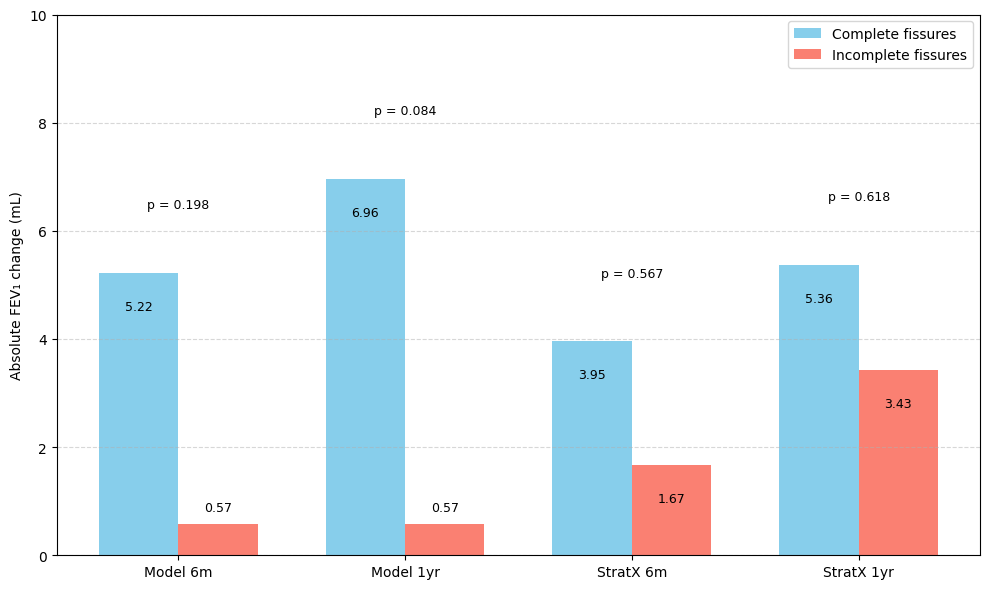

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# === Load TLVR Excel file ===
tlvr_path = r"------ INSERT PATH HERE ------\TLVR_List.xlsx"
df = pd.read_excel(tlvr_path)

# === Clean MRN column ===
df["MRN"] = df["MRN"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True)

# === Define thresholds ===
model_thresh = 92
stratx_thresh = 95

# === Define FEV1 columns to test ===
post_fev_cols = ["PostFev1_6m", "PostFev1_1yr"]

# === Compute delta FEV1 values ===
for col in post_fev_cols:
    delta_col = f"Delta_{col}"
    df[delta_col] = df[col] - df["PreFev1"]

# === Prepare means and p-values ===
bar_labels = ["Model 6m", "Model 1yr", "StratX 6m", "StratX 1yr"]
complete_means = []
incomplete_means = []
p_values = []

# Model comparisons
for col in post_fev_cols:
    delta = f"Delta_{col}"
    comp = df[df["ModelCompleteness"] >= model_thresh][delta].dropna()
    incomp = df[df["ModelCompleteness"] < model_thresh][delta].dropna()
    complete_means.append(comp.mean())
    incomplete_means.append(incomp.mean())
    p_values.append(ttest_ind(comp, incomp, equal_var=False)[1])

# StratX comparisons
for col in post_fev_cols:
    delta = f"Delta_{col}"
    comp = df[df["StratXCompleteness"] >= stratx_thresh][delta].dropna()
    incomp = df[df["StratXCompleteness"] < stratx_thresh][delta].dropna()
    complete_means.append(comp.mean())
    incomplete_means.append(incomp.mean())
    p_values.append(ttest_ind(comp, incomp, equal_var=False)[1])

# === Plotting ===
x = np.arange(len(bar_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(x - width / 2, complete_means, width, label="Complete fissures", color="skyblue")
bar2 = ax.bar(x + width / 2, incomplete_means, width, label="Incomplete fissures", color="salmon")

# Annotate p-values above bars
for i, p in enumerate(p_values):
    max_height = max(complete_means[i], incomplete_means[i])
    ax.text(x[i], max_height + 1.2, f"p = {p:.3f}", ha="center", fontsize=9)

# Annotate bar values: inside if tall, above if short
for i in range(len(bar_labels)):
    # Complete bar
    if complete_means[i] > 1.5:
        ax.text(x[i] - width / 2, complete_means[i] - 0.5, f"{complete_means[i]:.2f}",
                ha="center", va="top", fontsize=9)
    else:
        ax.text(x[i] - width / 2, complete_means[i] + 0.2, f"{complete_means[i]:.2f}",
                ha="center", va="bottom", fontsize=9)

    # Incomplete bar
    if incomplete_means[i] > 1.5:
        ax.text(x[i] + width / 2, incomplete_means[i] - 0.5, f"{incomplete_means[i]:.2f}",
                ha="center", va="top", fontsize=9)
    else:
        ax.text(x[i] + width / 2, incomplete_means[i] + 0.2, f"{incomplete_means[i]:.2f}",
                ha="center", va="bottom", fontsize=9)

# Axis labels and title
ax.set_ylabel("Absolute FEV₁ change (mL)")
ax.set_xticks(x)
ax.set_xticklabels(bar_labels)
ax.set_title("", pad=20)
ax.set_ylim(0, 10)
ax.legend()
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.savefig(r"------ INSERT PATH HERE ------\Figure7.png", dpi=300, bbox_inches='tight')
plt.show()


## Removal rate

In [ ]:
import pandas as pd

# === Load TLVR Excel file ===
tlvr_path = r"------ INSERT PATH HERE ------\TLVR_List.xlsx"
df = pd.read_excel(tlvr_path)

# === Clean MRN column ===
df["MRN"] = df["MRN"].astype(str).str.strip().str.replace(r"\.0$", "", regex=True)

# === Define completeness thresholds ===
model_thresh = 92
stratx_thresh = 95

# === Ensure Removed_1yr column is binary ===
df["Removed_1yr"] = df["Removed_1yr"].fillna(0).astype(int)

# === Model-derived groups ===
model_complete = df[df["ModelCompleteness"] >= model_thresh]
model_incomplete = df[df["ModelCompleteness"] < model_thresh]

model_removal_rate_complete = model_complete["Removed_1yr"].mean()
model_removal_rate_incomplete = model_incomplete["Removed_1yr"].mean()

# === StratX-derived groups ===
stratx_complete = df[df["StratXCompleteness"] >= stratx_thresh]
stratx_incomplete = df[df["StratXCompleteness"] < stratx_thresh]

stratx_removal_rate_complete = stratx_complete["Removed_1yr"].mean()
stratx_removal_rate_incomplete = stratx_incomplete["Removed_1yr"].mean()

# === Print results ===
print("🔹 Model-derived fissure completeness (threshold ≥ 92):")
print(f"   • Complete fissures - 1-year removal rate: {model_removal_rate_complete:.2%}")
print(f"   • Incomplete fissures - 1-year removal rate: {model_removal_rate_incomplete:.2%}")

print("\n🔹 StratX-derived fissure completeness (threshold ≥ 95):")
print(f"   • Complete fissures - 1-year removal rate: {stratx_removal_rate_complete:.2%}")
print(f"   • Incomplete fissures - 1-year removal rate: {stratx_removal_rate_incomplete:.2%}")


🔹 Model-derived fissure completeness (threshold ≥ 92):
   • Complete fissures - 1-year removal rate: 29.55%
   • Incomplete fissures - 1-year removal rate: 10.53%

🔹 StratX-derived fissure completeness (threshold ≥ 95):
   • Complete fissures - 1-year removal rate: 28.95%
   • Incomplete fissures - 1-year removal rate: 13.64%
